# Compute the sensitivity of SHiP to the scalar portal

In [1]:
]st

Status `~/Documents/Research/Projects/SensCalc/Code/SensMC/Project.toml`
⌃ [336ed68f] CSV v0.10.8
⌃ [a93c6f00] DataFrames v1.4.4
  [864edb3b] DataStructures v0.18.13
⌃ [31c24e10] Distributions v0.25.86
⌃ [e9467ef8] GLMakie v0.8.2
⌃ [5c1252a2] GeometryBasics v0.4.6
  [7073ff75] IJulia v1.24.0
⌃ [682c06a0] JSON v0.21.3
  [3f54b04b] LorentzVectors v0.4.3
  [ea0cff06] MDBM v0.1.6 `https://github.com/JLTastet/MDBM.jl#3788144`
⌅ [ee78f7c6] Makie v0.19.2
  [c03570c3] Memoize v0.4.4
  [e1d29d7a] Missings v1.1.0
  [3b2b4ff1] Multisets v0.4.4
⌃ [bac558e1] OrderedCollections v1.4.1
  [c46f51b8] ProfileView v1.7.1
  [438e738f] PyCall v1.95.1
  [d330b81b] PyPlot v2.11.1
⌃ [f2b01f46] Roots v2.0.10
⌃ [90137ffa] StaticArrays v1.5.18
⌅ [2913bbd2] StatsBase v0.33.21
  [8ba89e20] Distributed
  [37e2e46d] LinearAlgebra
  [1a1011a3] SharedArrays
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status 

In [2]:
using Random
Random.seed!(19694);

In [3]:
include("$(@__DIR__)/../lib/IncludeAll.jl")
include("$(@__DIR__)/../scripts/GenerateEvents.jl")
include("$(@__DIR__)/../scripts/ScanSensitivity.jl");

  Activating project at `~/Documents/Research/Projects/SensCalc/Code/SensMC`


In [4]:
@time mS, θ, debug = find_scalar_portal_sensitivity_mdbm(
    range(log10(0.1), log10(5), length=25),
    range(-6.5, -1, length=12), (1., 0.),
    2e20, :fairship_beauty, ["B -> S pi", "B -> S K?"],
    SHiP_geometry_ECN3;
    target_atomic_weight=96., # Molybdenum target
    iterations=3, Nsamples=8000000, CL=0.9,
    acceptance=:two_tracks_zero_charge,
    meson_spectrums_root="$(@__DIR__)/../data/FairShip")

┌ Warning: Reached the end of the meson list, looping back. This may violate the i.i.d. assumption.
└ @ Main ~/Documents/Research/Projects/SensCalc/Code/SensMC/scripts/GenerateEvents.jl:50


24883.596808 seconds (179.57 G allocations: 8.446 TiB, 2.60% gc time, 0.02% compilation time: 5% of which was recompilation)


([0.1010121730532967, 0.10308196676324852, 0.10534156214744696, 0.1051928603627942, 0.10749848904313355, 0.10734863871901729, 0.10969840874117347, 0.10954714025779863, 0.11194711308766221, 0.11179346199619113  …  4.778978731328111, 4.784318155603183, 4.78624360991964, 4.783769948392911, 4.777138548680404, 4.767655565287378, 4.75683759820432, 4.7439978825636535, 4.722497174210865, 4.672807835135296], [0.00029079343465037246, 0.0002879450184929478, 0.0002854331009164719, 0.0002851139697243881, 0.00028236373091272465, 0.0002822792452385244, 0.00027938892850899765, 0.0002794695542028933, 0.00027654335717211136, 0.0002767011091719116  …  3.391099610728341e-6, 3.918689631892849e-6, 4.53154043114488e-6, 5.240890800572306e-6, 6.05743172978275e-6, 6.9935175479239286e-6, 8.065556174926238e-6, 9.28925586080689e-6, 1.0625531374489932e-5, 1.175333129652128e-5], (mass_evaluated = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1  …  5.000000000000001, 5.000000000000001, 5.000000000000001, 5.00000000

Save the raw output (may require further processing):

In [5]:
save_sensitivity_mdbm("$(@__DIR__)/../tables/sensitivity/SHiP", "SHiP_scalar_sensitivity_CL90", mS, θ, debug; column_names=("mS", "theta"))

Save the curve as an unordered list of $(m_S, \theta^2)$ pairs:

In [6]:
using MDBM
using DataFrames
x, y = getinterpolatedsolution(debug.mdbm)
df = DataFrame(mS = 10.0 .^ x, theta2 = (10.0 .^ y) .^ 2)

Row,mS,theta2
,Float64,Float64
1,0.101012,8.45608e-8
2,0.103082,8.29123e-8
3,0.105342,8.14721e-8
4,0.105193,8.129e-8
5,0.107498,7.97293e-8
6,0.107349,7.96816e-8
7,0.109698,7.80582e-8
8,0.109547,7.81032e-8
9,0.111947,7.64762e-8


In [7]:
using PyPlot
PyPlot.svg(true);

In [8]:
function make_plot(; title="", xlabel=raw"$m_S\;[\mathrm{GeV}]$", ylabel=raw"$theta^2$", figsize=(6.4, 4.8))
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_yscale("log")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel);
    ax.grid(color="gray", linestyle=":")
    ax.autoscale()
    ax.set_title(title)
    fig, ax
end

make_plot (generic function with 1 method)

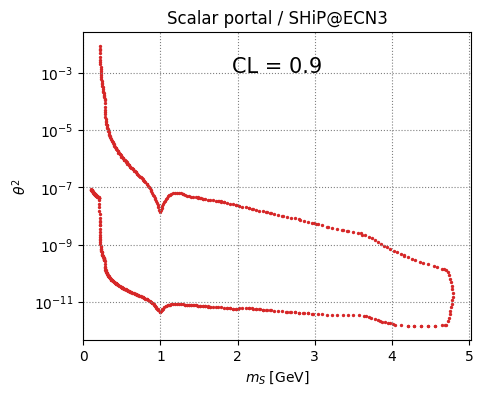

PyObject Text(0.5, 0.92, 'CL = 0.9')

In [9]:
fig, ax = make_plot(title="Scalar portal / SHiP@ECN3", xlabel=raw"$m_S\;[\mathrm{GeV}]$", ylabel=raw"$\theta^2$", figsize=(5,4))
ax.scatter(df.mS, df.theta2, s=2, color="tab:red")
ax.autoscale()
ax.set_xlim(left=0)
#ax.legend()
ax.text(0.5, 0.92, "CL = 0.9", fontsize=15, transform=ax.transAxes, ha="center", va="top")

In [10]:
CSV.write("$(@__DIR__)/../tables/sensitivity/SHiP/SHiP_scalar_sensitivity_CL90_unordered.csv", df)

"/Users/jl/Documents/Research/Projects/SensCalc/Code/SensMC/notebooks/../tables/sensitivity/SHiP/SHiP_scalar_sensitivity_CL90_unordered.csv"